In [52]:
import sys
import types
import cv2
import numpy as np
from io import StringIO ## for Python 3
from urllib.request import urlopen

def load_code_from_url(url_path):
  code_str = urlopen(url_path).read()
  code_str = code_str.decode('utf-8')
  return code_str

code_str = load_code_from_url("https://raw.githubusercontent.com/hoat23/VisionArtificialAndImageProcessing/master/bin/utils_imgprocessing.py")
exec(code_str)

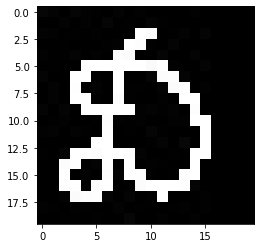

In [53]:
#url_img = "https://raw.githubusercontent.com/hoat23/VisionArtificialAndImageProcessing/master/img/img_02.jpg"
url_img = "https://raw.githubusercontent.com/hoat23/VisionArtificialAndImageProcessing/master/img/img_04_20x20.jpg"
img_orig = load_image_from_url(url_img)
plt.imshow(img_orig)
plt.show()

In [54]:
from skimage import data, segmentation
from skimage.segmentation import mark_boundaries
from skimage.future import graph
from google.colab.patches import cv2_imshow

img_tmp = img_orig

# Aplying SLIC algorithm to get the matrix of labels with 4 segments
n_segments = 4
labels = segmentation.slic(img_tmp, compactness=30, n_segments=n_segments)
img_boundaries_slic = mark_boundaries(img_tmp, labels,color=(255,0,0),background_label=3)
print(labels)

[[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 2 2 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 2 2 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 2 2 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1]
 [0 0 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1]
 [0 0 0 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1]
 [0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1]
 [0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1]
 [0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1]
 [0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1]
 [0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 3 3 3 1]
 [0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3]
 [0 0 2 2 2 2 2 3 2 2 2 2 2 2 2 3 3 3 3 3]
 [0 0 2 2 2 2 2 3 2 2 2 2 2 2 2 3 3 3 3 3]
 [0 0 2 2 2 2 2 3 3 2 2 2 2 2 3 3 3 3 3 3]
 [0 3 3 2 2 2 3 3 3 3 3 2 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


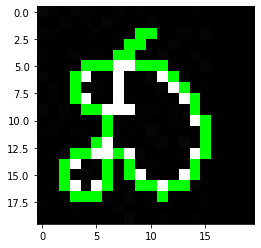

In [55]:
# Countours Detection
filter_value = 2; threshold_level = 0; mode = cv2.RETR_EXTERNAL # _LIST _EXTERNAL _CCOMP _TREE

mask_8bit = np.uint8( np.where(labels == filter_value, 1 , 0) )
print(mask_8bit)
_, binarized = cv2.threshold(mask_8bit, threshold_level, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(binarized, mode, cv2.CHAIN_APPROX_SIMPLE)

# Drawing contours
countourIdx=255; color = (0,255,0); thickness = 3
img_show = cv2.drawContours(img_orig, contours, -1, (0, 255, 0), 1) 
plt.imshow(img_show)
plt.show()